# Titanic kaggle project (top 9%)

In [241]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb; sb.set(style="ticks", color_codes=True, rc={'figure.figsize':(30,30)})
from matplotlib import pyplot as plt
%matplotlib inline

## Data Eploration

In [242]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [243]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [244]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [245]:
nb_train_obs = df_train.shape[0]

In [246]:
nb_test_obs = df_test.shape[0]

### Skewed Data 

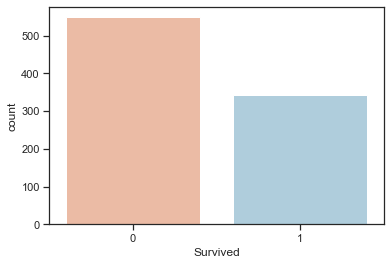

In [247]:
sb.countplot(x='Survived', data = df_train, palette='RdBu')

In [248]:
df_target = df_train['Survived'].copy()
df_train = df_train.drop(['Survived'], axis=1)

### Missing values 

In [249]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [250]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [251]:
corr = df_train.corr()
corr

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


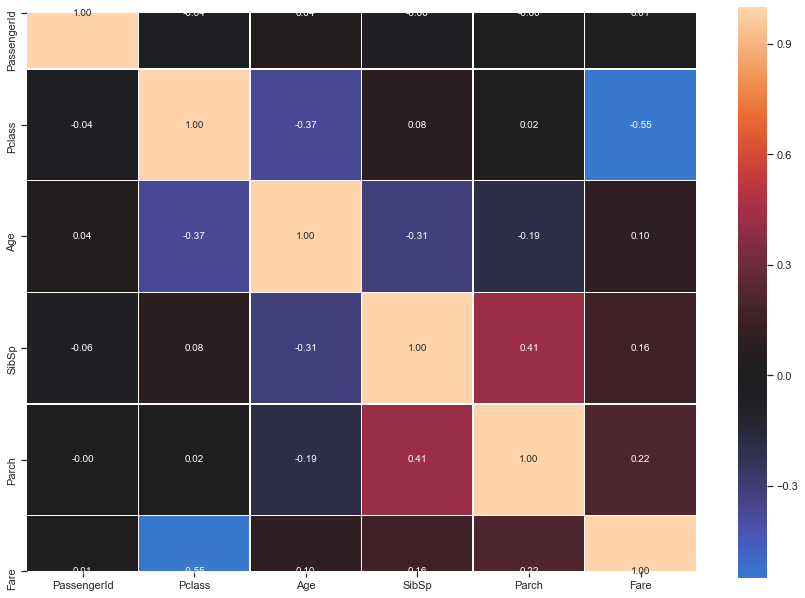

In [252]:
plt.figure(figsize=(15, 15))
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

In [253]:
df = pd.concat([df_train, df_test])

In [254]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


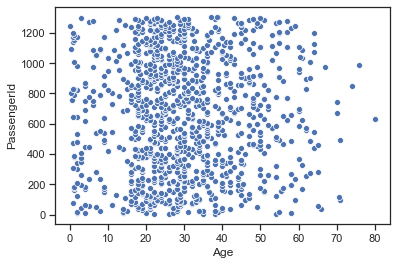

In [255]:
sb.scatterplot(df['Age'], df['PassengerId'])

In [256]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [257]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [258]:
df.shape[0]

1309

In [299]:
df['Cabin'].fillna("Unkonwn", inplace=True)

In [260]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
dtype: int64

In [261]:
df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [262]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [263]:
df_to_pred_age = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

In [264]:
df_to_pred_age_test = df_to_pred_age[df_to_pred_age.isnull().any(axis=1)].copy()
df_to_pred_age_test

,Pclass,Age,SibSp,Parch,Fare
5,3,NaN,0,0,8.4583
17,2,NaN,0,0,13.0000
19,3,NaN,0,0,7.2250
26,3,NaN,0,0,7.2250
28,3,NaN,0,0,7.8792
...,...,...,...,...,...
408,3,NaN,0,0,7.7208
410,3,NaN,0,0,7.7500
413,3,NaN,0,0,8.0500
416,3,NaN,0,0,8.0500


In [265]:
df_to_pred_age_train = df_to_pred_age.dropna()

In [266]:
df_to_pred_age_train

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
409,3,3.0,1,1,13.7750
411,1,37.0,1,0,90.0000
412,3,28.0,0,0,7.7750
414,1,39.0,0,0,108.9000


In [267]:
rf = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=780,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [268]:
df_age_X = df_to_pred_age_train.drop(['Age'], axis=1)
df_age_y = df_to_pred_age_train['Age']

In [269]:
rf = rf.fit(df_age_X, df_age_y)

In [270]:
df_to_pred_age_test['Age'] = rf.predict(df_to_pred_age_test.drop(['Age'], axis=1))


In [271]:
df_to_pred_age_test['Age']

5      20.828500
17     32.160714
19     27.807692
26     27.807692
28     22.500000
         ...    
408    22.000000
410    32.625000
413    29.500000
416    29.500000
417    29.402030
Name: Age, Length: 263, dtype: float64

In [272]:
df.loc[df['Age'].isnull(), 'Age'] = df_to_pred_age_test['Age'].copy()

In [273]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [274]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [275]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [276]:
df = df.drop(['PassengerId'], axis=1)

In [277]:
df = df.drop(['Name'], axis=1)

In [278]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [279]:
df['Ticket'].value_counts()

CA. 2343           11
1601                8
CA 2144             8
S.O.C. 14879        7
PC 17608            7
                   ..
334914              1
SOTON/OQ 392083     1
C.A. 24580          1
330924              1
347063              1
Name: Ticket, Length: 929, dtype: int64

In [280]:
df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Categorical Data 

In [281]:
le = LabelEncoder()

In [282]:
cat_features = [f for f in df.columns.values if df[f].dtypes == object]

In [283]:
for f in cat_features:
    df[f] = le.fit_transform(df[f])

In [284]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,720,7.2500,186,2
1,1,0,38.0,1,0,816,71.2833,106,0
2,3,0,26.0,0,0,914,7.9250,186,2
3,1,0,35.0,1,0,65,53.1000,70,2
4,3,1,35.0,0,0,649,8.0500,186,2


In [285]:
df_train_1 = df.iloc[0:nb_train_obs, :]
df_test_1 = df.iloc[nb_train_obs:, :]

In [286]:
df_test_1.shape

(418, 9)

### Splitting Data 

In [225]:
X_train, X_test, y_train, y_test = train_test_split(df_train_1,df_target,test_size=0.3, random_state=0)

### Model 

In [226]:
rf = RandomForestClassifier()
#Nombre d'arbres
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
#Nombre de features dans chaque division
max_features = ['auto', 'sqrt']
#nombre maximal des niveaux de l'arbre
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Nombre minimal d'exemples nécessaires pour la division d'un noeud
min_samples_split = [2, 5, 10, 15, 20]
#Nombre minimale d'exemples qui seront dans chaque feuille d'arbre
min_samples_leaf = [1, 2, 4]
#Méthode de sélection des exemples pour l'entrainement de chaque arbre
bootstrap = [True, False]

#Random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [227]:
random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [228]:
random_search = random_search.fit(X_train, y_train)
#Estimateur avec meilleurs paramètres
random_search.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=780,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [287]:
clf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=780,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [289]:
df_test_1.shape

(418, 9)

In [290]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=780,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [291]:
y_pred = clf.predict(X_test)

### Metrics 

In [292]:
accuracy_score(y_test, y_pred)

0.8246268656716418

In [293]:
confusion_matrix(y_test, y_pred)

array([[150,  18],
       [ 29,  71]])

In [294]:
predictions = clf.predict(df_test_1)

In [297]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':predictions})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [298]:
filename = 'titanic.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: titanic.csv
